# Spikes

author: steeve.laquitaine@epfl.ch  
purpose: extract spike sorted waveforms

### Steps

1. Spike sorting (21 min): `notebooks/0_method/4_sorting/silico/0_marques/sorting.ipynb`

2. Waveform extraction (23 min): `notebooks/0_method/5_postpro/silico/0_marques/waveform.ipynb`

In [1]:
# import libs
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import spikeinterface as si
import spikeinterface.extractors as se
from scipy.optimize import minimize
import spikeinterface.full as si_full
import seaborn as sns

# move to PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.study import amplitude
from src.nodes.postpro import waveform

# SETUP PARAMETERS
MS_BEFORE = 3           # ms
MS_AFTER = 3            # ms

# vivo
data_conf_vivo, param_conf_h_vivo = get_config("vivo_marques", "c26").values() 
RAW_PATH_vivo = data_conf_vivo["raw"]
PREP_PATH_vivo = data_conf_vivo["preprocessing"]["output"]["trace_file_path"]
SNR_PATH_vivo = data_conf_vivo["postprocessing"]["trace_snr"]
STUDY_FOLDER_vivo = data_conf_vivo["postprocessing"]["waveform"]["study"]

# silico
data_conf_sili, param_conf_sili = get_config("silico_neuropixels", "2023_10_18").values()
RAW_PATH_sili = data_conf_sili["recording"]["input"]
PREP_PATH_sili = data_conf_sili["preprocessing"]["output"]["trace_file_path"]
SNR_PATH_sili = data_conf_sili["postprocessing"]["trace_snr"]
STUDY_FOLDER_sili = data_conf_sili["postprocessing"]["waveform"]["study"]


# FIGURE SETTINGS
COLOR_VIVO = (0.7, 0.7, 0.7)
COLOR_SILI = (0.84, 0.27, 0.2)
BOX_ASPECT = 1                  # square fig
FIG_SIZE = (4,4)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 24
N_MAJOR_TICKS = 6
N_MINOR_TICKS = 12
legend_cfg = {"frameon": False, "handletextpad": 0.1}
savefig_cfg = {"transparent":True}

2024-01-15 14:06:58,780 - root - utils.py - get_config - INFO - Reading experiment config.
2024-01-15 14:06:58,792 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-01-15 14:06:58,793 - root - utils.py - get_config - INFO - Reading experiment config.
2024-01-15 14:06:58,808 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [2]:
# takes 24 min
# load stuffs
Recording = si.load_extractor(PREP_PATH_sili)
WaveformExtractor = waveform.load(
    Recording,
    study_folder=STUDY_FOLDER_sili,
    ms_before=MS_BEFORE,
    ms_after=MS_AFTER,
)

In [9]:
# list sorted units
WaveformExtractor.unit_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 18

### Profile 1

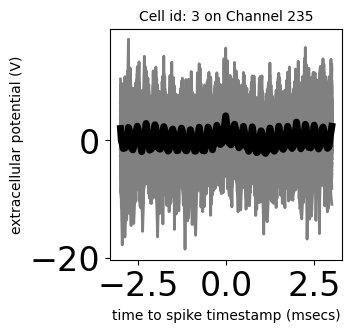

In [8]:
# takes 1.5 min
fig = waveform.plot(
    WaveformExtractor=WaveformExtractor,
    cell_id=3,
    colors=[(0.5, 0.5, 0.5), (0, 0, 0)],
    linewidth_instance=2,
    linewidth_mean=5,
)
fig
# plt.savefig("figures/2_realism/3_spikes/1_shape/npx384_sim_hex01/spike_shape_1.pdf")

In [ ]:
##